# Embodied cognition on Wikipedia: a data analysis
In what follows, an analysis of the page edits and views count is done. The data is provided by the WikipediaStatistics at en.wikipedia.org

### Load data

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import datetime

df_views_count = pd.read_csv('wiki_ec_page_views.csv', delimiter=",", header=0, index_col=False)

df_edits_count = pd.read_csv('wiki_ec_edits_count.csv', delimiter=",", header=0, index_col=False)

# Converting date to a datestamp type
df_views_count["DateTime"] = pd.to_datetime(df_views_count["DateTime"])
df_edits_count["Month"] = pd.to_datetime(df_edits_count["Month"])


# # Check for missing values
# print(df_views_count.isnull().sum())
print(df_edits_count.isnull().sum())
#
# Setting DateTime as index in csv files
df_views_count = df_views_count.set_index("DateTime")
df_edits_count = df_edits_count.set_index("Month")

df_edits_count.index

Month            0
Edits            0
IPs              0
IPs%             0
Minor edits      0
Minor edits%     0
dtype: int64


DatetimeIndex(['2002-04-01', '2002-05-01', '2002-06-01', '2002-07-01',
               '2002-08-01', '2002-09-01', '2002-10-01', '2002-11-01',
               '2002-12-01', '2004-01-01',
               ...
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', name='Month', length=228, freq=None)

### 1. Edits count

In [2]:
df_edits_count

,Edits,IPs,IPs%,Minor edits,Minor edits%
Month,,,,,
2002-04-01,7,6,85.7,2,28.6
2002-05-01,0,0,0.0,0,0.0
2002-06-01,0,0,0.0,0,0.0
2002-07-01,0,0,0.0,0,0.0
2002-08-01,0,0,0.0,0,0.0
...,...,...,...,...,...
2021-11-01,19,2,10.5,2,10.5
2021-12-01,53,1,1.9,17,32.1
2022-01-01,87,0,0.0,31,35.6


In [3]:
# Select the edits per year and month
edits_year = df_edits_count.index.year
print(edits_year)

Int64Index([2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2004,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2022, 2022, 2022],
           dtype='int64', name='Month', length=228)


In [4]:
# Sum per year
edit_sum_year = df_edits_count["Edits"].groupby(edits_year).sum()
minor_sum_year = df_edits_count["Minor edits"].groupby(edits_year).sum()
editors_sum_year = df_edits_count["IPs"].groupby(edits_year).sum()

edit_sum_year  = pd.DataFrame(edit_sum_year)
edit_sum_year["Minor edits"] = pd.DataFrame(minor_sum_year)
edit_sum_year["Editors"] = pd.DataFrame(editors_sum_year)
edit_sum_year

,Edits,Minor edits,Editors
Month,,,
2002,8,2,6
2004,32,16,11
2005,16,3,9
2006,17,6,5
2007,16,7,4
2008,42,27,2
2009,38,17,9
2010,30,12,7
2011,203,28,33


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 1800x1080 with 0 Axes>

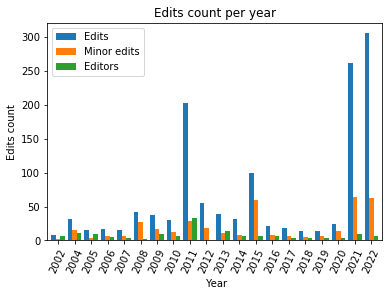

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 1800x1080 with 0 Axes>

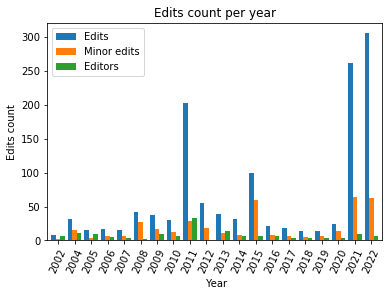

In [8]:
# sns.histplot(df_edit_sum_year, x="Month", )
plt.figure(figsize=(25,15))

# ax = edit_sum_year.plot(kind='line')

ax = edit_sum_year.plot(kind="bar", width = 0.8)
ax.set_xlabel(" Year")
ax.set_ylabel("Edits count")
ax.set_title("Edits count per year")
plt.xticks(rotation=65)

# Save image high resolution image
# path = os.path.a
image_format = 'eps' # e.g .png, .svg, etc.
plt.savefig('Images/edits_count.eps', format=image_format, dpi=1200)
plt.show()


### 2. Views count

In [68]:
df_views_count

,Embodied cognition[en],Cognitive science[en],Cognition[en]
DateTime,,,
2008-01-01,12,426,612
2008-01-02,4,600,1147
2008-01-03,4,641,1256
2008-01-04,14,627,1197
2008-01-05,7,521,864
...,...,...,...
2022-03-13,156,224,395
2022-03-14,196,318,561
2022-03-15,186,293,574


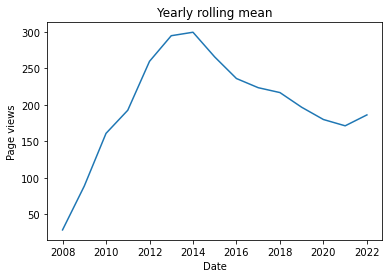

In [95]:
# select the month
df_month = df_views_count.index.month
df_year = df_views_count.index.year
# Moving averages per year (52 weeks window)
df_mean = df_views_count['Embodied cognition[en]'].groupby(df_year).mean()

ax = df_mean.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Page views")
ax.set_title("Yearly rolling mean")

plt.show()

In [374]:
views_before_project = df_views_count['2020-03-01':'2021-02-28']
views_during_project = df_views_count['2021-03-01':'2022-02-28']


views_average_1 = df_views_count['2008-03-01':'2020-02-28']

views_average_1
views_average_1_month = views_average_1.index.month
#
#
views_average_1 = views_average_1['Embodied cognition[en]'].groupby(views_average_1_month).mean()
#
# # views_during_project
# views_before_project_month = views_before_project.index.month
# views_during_project_month = views_during_project.index.month
#
views_average_1
# # views_during_project.tail(50)
#

DateTime
1     216.911290
2     243.355030
3     228.083333
4     234.469444
5     213.661290
6     172.911111
7     146.502688
8     150.236559
9     195.669444
10    241.295699
11    245.041667
12    209.336022
Name: Embodied cognition[en], dtype: float64

In [377]:
views_during_project_mean = views_during_project['Embodied cognition[en]'].groupby(views_during_project_month).mean()
views_before_project_mean = views_before_project['Embodied cognition[en]'].groupby(views_before_project_month).mean()
views_cogsci_project_mean = views_during_project['Cognitive science[en]'].groupby(views_during_project_month).sum()

mean_view_average_before = views_before_project_mean / views_average_1
mean_view_average_after = views_during_project_mean / views_average_1

# Without normalizing
mean_view = pd.DataFrame()
mean_view['Before'] = pd.DataFrame(views_before_project_mean)
mean_view['After'] = pd.DataFrame(views_during_project_mean)
# mean_view['CogSci'] = pd.DataFrame(views_cogsci_project_mean)
# mean_view
# mean_view.describe()

# Normalizing the data
mean_view_averaged = pd.DataFrame()
mean_view_averaged['Before'] = pd.DataFrame(mean_view_average_before)
mean_view_averaged['After'] = pd.DataFrame(mean_view_average_after)

mean_view_averaged.describe()

,Before,After
count,12.000000,12.000000
mean,0.856535,0.834481
std,0.070292,0.041711
min,0.761748,0.758592
25%,0.807020,0.806702
50%,0.858352,0.837091
75%,0.898023,0.855575
max,1.011361,0.913186


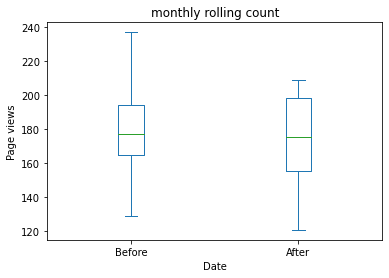

In [365]:
# fig, ax  = plt.subplots()

ax = mean_view.plot(kind='box')
# ax = mean_view.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Page views")
ax.set_title("monthly rolling count")

plt.show()

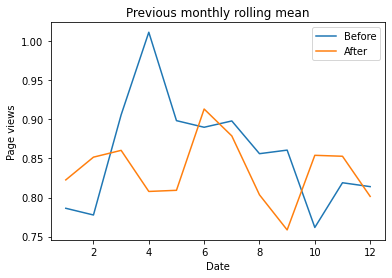

In [378]:
views_before_project_mean = views_before_project['Embodied cognition[en]'].groupby(views_before_project_month)

ax = mean_view_averaged.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Page views")
ax.set_title("Previous monthly rolling mean")

plt.show()